# Capstone Assignment: Segmenting and Clustering Neighborhoods in Toronto

Submission by: Linus Fones      
Date: 30 Apr 2020

## 1. To get the postal code, borough, and neighborhoods in Toronto

In [1]:
#Import necessary modules and libraries
import pandas as pd
import numpy as np
from urllib.request import urlopen
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup 
!conda install -c conda-forge lxml --yes

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # install folium 
import folium # map rendering library

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
#Get the webpage from Wikipedia - List of postal codes of Canada: M

url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)

#Create a Beautiful Soup object from the html
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [3]:
# Print the first 5 rows of the neighbourhood table
rows = soup.find_all('tr')
print(rows[:5])

[<tr>
<th>Postal code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>, <tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>, <tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>, <tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>, <tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>]


In [4]:
# Find all the cells of the rows, remove html tags using Beautiful Soup get_text() method and append to a list
list_rows = []
for row in rows:
    row_td = row.find_all('td')
    str_cells = str(row_td)
    cleantext = BeautifulSoup(str_cells, "lxml").get_text(strip=True)
    list_rows.append(cleantext)
print(list_rows)
type(list_rows)

['[]', '[M1A,Not assigned,]', '[M2A,Not assigned,]', '[M3A,North York,Parkwoods]', '[M4A,North York,Victoria Village]', '[M5A,Downtown Toronto,Regent Park / Harbourfront]', '[M6A,North York,Lawrence Manor / Lawrence Heights]', "[M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government]", '[M8A,Not assigned,]', '[M9A,Etobicoke,Islington Avenue]', '[M1B,Scarborough,Malvern / Rouge]', '[M2B,Not assigned,]', '[M3B,North York,Don Mills]', '[M4B,East York,Parkview Hill / Woodbine Gardens]', '[M5B,Downtown Toronto,Garden District, Ryerson]', '[M6B,North York,Glencairn]', '[M7B,Not assigned,]', '[M8B,Not assigned,]', '[M9B,Etobicoke,West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale]', '[M1C,Scarborough,Rouge Hill / Port Union / Highland Creek]', '[M2C,Not assigned,]', '[M3C,North York,Don Mills]', '[M4C,East York,Woodbine Heights]', '[M5C,Downtown Toronto,St. James Town]', '[M6C,York,Humewood-Cedarvale]', '[M7C,Not assigned,]', '[M8C,Not assigned,]', '[M9C,Eto

list

In [5]:
#Convert the list into a dataframe and drop the first row which is empty
df = pd.DataFrame(list_rows)
df.drop(df.index[0], inplace=True)
df.head(10)

,0
1,"[M1A,Not assigned,]"
2,"[M2A,Not assigned,]"
3,"[M3A,North York,Parkwoods]"
4,"[M4A,North York,Victoria Village]"
5,"[M5A,Downtown Toronto,Regent Park / Harbourfront]"
6,"[M6A,North York,Lawrence Manor / Lawrence Heig..."
7,"[M7A,Downtown Toronto,Queen's Park / Ontario P..."
8,"[M8A,Not assigned,]"
9,"[M9A,Etobicoke,Islington Avenue]"
10,"[M1B,Scarborough,Malvern / Rouge]"


In [6]:
# Split the "0" column into multiple columns at the comma position
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
1,[M1A,Not assigned,],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,[M2A,Not assigned,],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,[M3A,North York,Parkwoods],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[M4A,North York,Victoria Village],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,[M5A,Downtown Toronto,Regent Park / Harbourfront],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,[M6A,North York,Lawrence Manor / Lawrence Heights],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,[M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,[M8A,Not assigned,],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,[M9A,Etobicoke,Islington Avenue],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10,[M1B,Scarborough,Malvern / Rouge],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
# We only need the first three columns
df1 = df1.iloc[:,[0,1,2]]
df1.head(5)

,0,1,2
1,[M1A,Not assigned,]
2,[M2A,Not assigned,]
3,[M3A,North York,Parkwoods]
4,[M4A,North York,Victoria Village]
5,[M5A,Downtown Toronto,Regent Park / Harbourfront]


In [8]:
#Strip square brackets
df1[0] = df1[0].str.strip('[')
df1[2] = df1[2].str.strip(']')
df1.head(5)

,0,1,2
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Regent Park / Harbourfront


In [9]:
#Get table header
col_labels = soup.find_all('th')
all_header = []
col_str = str(col_labels)
headertext = BeautifulSoup(col_str, "lxml").get_text(strip=True)
all_header.append(headertext)
print(all_header)

['[Postal code,Borough,Neighborhood,Canadian postal codes]']


In [10]:
#Covert list to dataframe, we only need the first 3 columns
df2 = pd.DataFrame(all_header)
df2 = df2[0].str.split(',', expand=True)
df2 = df2.iloc[:,[0,1,2]]
df2[0] = df2[0].str.strip('[')
df2

,0,1,2
0,Postal code,Borough,Neighborhood


In [11]:
#Cancat the two dataframes
frames = [df2, df1]

df3 = pd.concat(frames)
df3.head(5)

,0,1,2
0,Postal code,Borough,Neighborhood
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


In [12]:
#Replace column names with first row
df3.rename(columns=df3.iloc[0], inplace=True)
df3.drop(df3.index[0], inplace=True)
df3.head()

,Postal code,Borough,Neighborhood
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Regent Park / Harbourfront


In [13]:
#Drop all rows where Borough is "Not assigned"
df4 = df3.drop(df3[df3['Borough'] == "Not assigned"].index, axis=0)
#Drop last 4 rows which are irrelervant
df4 = df4[:-4]
#Replace '/' with ',' in 
df4.replace(to_replace=r'/', value=',', regex=True, inplace=True)
df4.rename(columns={'Postal code': 'Postal Code'}, inplace=True)
df4

,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park , Harbourfront"
6,M6A,North York,"Lawrence Manor , Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
...,...,...,...
161,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North"
166,M4Y,Downtown Toronto,Church and Wellesley
169,M7Y,East Toronto,Business reply mail Processing CentrE
170,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,..."


In [14]:
df_toronto = df4
df_toronto.shape

(103, 3)

# 2. To get the latitude and the longitude coordinates of each neighborhood

#### This code is commented because geocoder.google() is not responding 

In [15]:
#!conda install -c conda-forge geocoder
"""
import geocoder # import geocoder

# initialize variable to None
lat_lng_coords = None

latitude = []
longitude = []

for postal_code in df_toronto['Postal code']:
    # loop until you get the coordinates
    while(lat_lng_coords is None):
          print("Get lat, long of postal code: " + postal_code) 
          g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
          lat_lng_coords = g.latlng
        
    print(lat_lng_coords[0])    
    latitude.append(lat_lng_coords[0])
    print(lat_lng_coords[1])
    longitude.append(lat_lng_coords[1])
        
df_toronto['Latitude'] = latitude
df_toronto['Longitude'] = longitude
df_toronto
"""

'\nimport geocoder # import geocoder\n\n# initialize variable to None\nlat_lng_coords = None\n\nlatitude = []\nlongitude = []\n\nfor postal_code in df_toronto[\'Postal code\']:\n    # loop until you get the coordinates\n    while(lat_lng_coords is None):\n          print("Get lat, long of postal code: " + postal_code) \n          g = geocoder.google(\'{}, Toronto, Ontario\'.format(postal_code))\n          lat_lng_coords = g.latlng\n        \n    print(lat_lng_coords[0])    \n    latitude.append(lat_lng_coords[0])\n    print(lat_lng_coords[1])\n    longitude.append(lat_lng_coords[1])\n        \ndf_toronto[\'Latitude\'] = latitude\ndf_toronto[\'Longitude\'] = longitude\ndf_toronto\n'

#### Get Lat, Long info for each postal code from Geospatial_data.csv file.

In [16]:
url = "http://cocl.us/Geospatial_data"
df_lat_long = pd.read_csv(url)
df_lat_long.head(5)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
# Merge lat, long fields to neighbourhood dataframe to create new dataframe 
toronto_data = pd.merge(df_toronto, df_lat_long, on='Postal Code')
toronto_data.head(5)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


In [18]:
toronto_data.shape

(103, 5)

# 3. To explore and cluster the neighborhoods in the city of Toronto

#### Define Foursquare Credentials and Version

In [48]:
CLIENT_ID = 'Client_id' # your Foursquare ID
CLIENT_SECRET = 'Client_secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Client_id
CLIENT_SECRET:Client_secret


#### Create function to repeat the same process to all the neighborhoods in Toronto

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function on each neighborhood and create a new dataframe called toronto_venues

In [21]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )
#Write to csv file just in case Foursqaure API is offline
toronto_venues.to_csv('toronto_venues.csv')

Parkwoods
Victoria Village
Regent Park , Harbourfront
Lawrence Manor , Lawrence Heights
Queen's Park , Ontario Provincial Government
Islington Avenue
Malvern , Rouge
Don Mills
Parkview Hill , Woodbine Gardens
Garden District
Glencairn
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale
Rouge Hill , Port Union , Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood
Guildwood , Morningside , West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor , Wilson Heights , Downsview North
Thorncliffe Park
Richmond , Adelaide , King
Dufferin , Dovercourt Village
Scarborough Village
Fairview , Henry Farm , Oriole
Northwood Park , York University
East Toronto
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
Kennedy Park , Ionview , East Birchmount Park
Bayview Village
Downsview
T

#### Let's check the size of the resulting dataframe

In [22]:
print(toronto_venues.shape)
toronto_venues.head()

(2129, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [23]:
#Let's check how many venues were returned for each neighborhood

toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,3,3,3,3,3,3
"Alderwood , Long Branch",8,8,8,8,8,8
"Bathurst Manor , Wilson Heights , Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park , Lawrence Manor East",24,24,24,24,24,24
...,...,...,...,...,...,...
"Wexford , Maryvale",4,4,4,4,4,4
Willowdale,38,38,38,38,38,38
Woburn,3,3,3,3,3,3


#### Let's find out how many unique categories can be curated from all the returned venues

In [24]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


### Let's Analyze Each Neighbourhood

In [25]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
toronto_onehot.shape

(2129, 269)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Alderwood , Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor , Wilson Heights , Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.047619,0.000000,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park , Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"Wexford , Maryvale",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
89,Willowdale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.026316,0.0,0.0,0.0,0.0,0.0
90,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
91,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0


#### Let's confirm the new size

In [28]:
toronto_grouped.shape

(93, 269)

#### Let's print each neighborhood along with the top 5 most common venues

In [29]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.33
1  Latin American Restaurant  0.33
2             Breakfast Spot  0.33
3                Men's Store  0.00
4          Mobile Phone Shop  0.00


----Alderwood , Long Branch----
            venue  freq
0     Pizza Place  0.25
1        Pharmacy  0.12
2             Pub  0.12
3  Sandwich Place  0.12
4     Coffee Shop  0.12


----Bathurst Manor , Wilson Heights , Downsview North----
         venue  freq
0  Coffee Shop  0.10
1         Bank  0.10
2     Pharmacy  0.05
3  Gas Station  0.05
4    Pet Store  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1                 Bank  0.25
2   Chinese Restaurant  0.25
3  Japanese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park , Lawrence Manor East----
                venue  freq
0         Pizza Place  0.08
1         Coffee Shop  0.08
2          Restaurant  0.08
3      Sandwich Place  0.08
4  Italian Restaurant  

#### Let's write a function to sort the venues in descending order.

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Lounge,Breakfast Spot,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Drugstore
1,"Alderwood , Long Branch",Pizza Place,Gym,Skating Rink,Pharmacy,Pub,Sandwich Place,Coffee Shop,Airport Service,College Gym,Ethiopian Restaurant
2,"Bathurst Manor , Wilson Heights , Downsview North",Bank,Coffee Shop,Pharmacy,Supermarket,Deli / Bodega,Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Convenience Store,Fried Chicken Joint
3,Bayview Village,Japanese Restaurant,Café,Bank,Chinese Restaurant,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
4,"Bedford Park , Lawrence Manor East",Coffee Shop,Pizza Place,Restaurant,Sandwich Place,Italian Restaurant,Sushi Restaurant,Comfort Food Restaurant,Cosmetics Shop,Pharmacy,Café


### Let's cluster the neighbourhood

#### Let's determine the value of k using an elbow plot

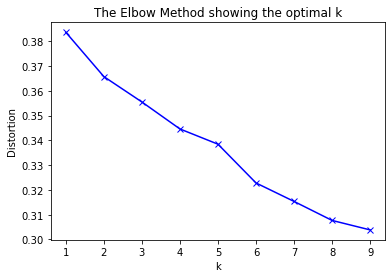

In [32]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

X = toronto_grouped_clustering
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Run k-means to cluster the neighborhood into 5 clusters.

In [33]:
# set number of clusters
kclusters = 5
      
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_)


[2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 1 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 0 1 4 2 2 3 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0]


#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [43]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

print(neighborhoods_venues_sorted.shape)
print(toronto_data.shape)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


toronto_merged['Cluster Labels'].fillna(kclusters, inplace=True) #set neighborhood without cluster label to kclusters + 1

print(toronto_merged['Cluster Labels'].isna().sum())
print(toronto_merged.loc[toronto_merged['Cluster Labels']==kclusters]) # check neighborhood without venues!

(93, 12)
(103, 5)
0
   Postal Code      Borough  \
5          M9A    Etobicoke   
11         M9B    Etobicoke   
45         M2L   North York   
52         M2M   North York   
95         M1X  Scarborough   

                                         Neighborhood   Latitude  Longitude  \
5                                    Islington Avenue  43.667856 -79.532242   
11  West Deane Park , Princess Gardens , Martin Gr...  43.650943 -79.554724   
45                          York Mills , Silver Hills  43.757490 -79.374714   
52                           Willowdale , Newtonbrook  43.789053 -79.408493   
95                                        Upper Rouge  43.836125 -79.205636   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5              5.0                   NaN                   NaN   
11             5.0                   NaN                   NaN   
45             5.0                   NaN                   NaN   
52             5.0                   NaN              

#### Finally, let's visualize the resulting clusters

##### Let's get the geographical coordinates of Toronto.

In [35]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters+1)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Let's Examine the Clusters

#### Cluster 1: Neighborhoods with a park nearby

In [37]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,0.0,Park,Food & Drink Shop,Construction & Landscaping,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Deli / Bodega,Dog Run
21,York,0.0,Park,Women's Store,Pool,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
35,East York,0.0,Park,Convenience Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Dance Studio
49,North York,0.0,Park,Basketball Court,Bakery,Construction & Landscaping,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
61,Central Toronto,0.0,Park,Swim School,Bus Line,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Deli / Bodega
66,North York,0.0,Park,Bank,Bar,Convenience Store,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
83,Central Toronto,0.0,Park,Tennis Court,Playground,Restaurant,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
85,Scarborough,0.0,Park,Playground,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store
91,Downtown Toronto,0.0,Park,Trail,Playground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
98,Etobicoke,0.0,Park,River,Smoke Shop,College Rec Center,College Gym,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant


#### Cluster 2: Two neighborhoods with very similar venues (8 out of 10)

In [38]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Scarborough,1.0,Fast Food Restaurant,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
62,Central Toronto,1.0,Garden,Women's Store,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Deli / Bodega


#### Cluster 3: Neighborhoods to go for coffee, 26 out of 84 have Coffee Shop or Cafe listed as the 1st most common venue

In [47]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,2.0,French Restaurant,Portuguese Restaurant,Coffee Shop,Pizza Place,Intersection,Hockey Arena,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,Downtown Toronto,2.0,Coffee Shop,Pub,Park,Bakery,Theater,Restaurant,Café,Breakfast Spot,Spa,Ice Cream Shop
3,North York,2.0,Clothing Store,Women's Store,Furniture / Home Store,Coffee Shop,Miscellaneous Shop,Event Space,Boutique,Accessories Store,Vietnamese Restaurant,Department Store
4,Downtown Toronto,2.0,Coffee Shop,Sushi Restaurant,Diner,Discount Store,Park,Mexican Restaurant,Juice Bar,Japanese Restaurant,Italian Restaurant,Hobby Shop
7,North York,2.0,Gym,Coffee Shop,Beer Store,Japanese Restaurant,Restaurant,Asian Restaurant,Café,Dim Sum Restaurant,Bike Shop,Supermarket
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Downtown Toronto,2.0,Coffee Shop,Café,Hotel,Gym,Restaurant,Japanese Restaurant,Salad Place,Steakhouse,Asian Restaurant,American Restaurant
99,Downtown Toronto,2.0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Yoga Studio,Men's Store,Hotel,Gastropub,Mediterranean Restaurant,Gay Bar
100,East Toronto,2.0,Light Rail Station,Park,Auto Workshop,Comic Shop,Pizza Place,Restaurant,Burrito Place,Brewery,Skate Park,Spa
101,Etobicoke,2.0,Locksmith,Baseball Field,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop


#### Cluster 4: Only neighbourhood with Health & Beauty Service listed as the 1st most common venue

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Scarborough,3.0,Health & Beauty Service,Playground,Women's Store,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center


#### Cluster 5: Only neighbourhood with Bar listed as the 1st most common venue

In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Scarborough,4.0,Bar,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Farmers Market


#### Cluster 6: Neighborhoods without venue info from Foursquare

In [45]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Etobicoke,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Etobicoke,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,North York,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,North York,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Scarborough,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
